# Dataset Source: eCommerce behavior data from multi category store

kaggle: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/data

This notebook will show the process I took to transform this kaggle dataset into the format specified by the interviewer.

### The specified Data Description

Customer Interactions:
* Customer ID
* Page views
* Time spent on the website

Purchase History:
* Customer ID
* Product ID
* Purchase date

Product Details:
* Product ID
* Category
* Price
* Ratings


Please **note** that this dataset does not include rating values. So I need to improvise and create another target label to train the model.

In [3]:
import pandas as pd
import json

This dude is huge (5gb+) 💀

In [4]:
oct = pd.read_csv("archive (2)/2019-Oct.csv")

In [5]:
len(oct.user_id.unique())

3022290

In [6]:
len(oct.product_id.unique())

166794

In [7]:
len(oct.product_id.unique())

166794

To save time, I selected only 10k users out of available 3022290

In [8]:
userid_sample = oct.user_id.unique()[:10_000]
productid_sample = oct.product_id.unique()[:1_000_000]

In [9]:
sample = oct[oct['user_id'].isin(userid_sample) & oct['product_id'].isin(productid_sample)]

In [10]:
sample

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42447012,2019-10-31 23:45:58 UTC,view,13400365,2053013557066334713,NaN,NaN,86.23,554595637,b4628ebd-b419-434a-ba25-78edc0728297
42447281,2019-10-31 23:48:07 UTC,view,13400279,2053013557066334713,NaN,NaN,99.87,554595637,b4628ebd-b419-434a-ba25-78edc0728297
42447760,2019-10-31 23:52:18 UTC,view,57100073,2152289023127715889,NaN,novline,33.98,515016965,8ca8247c-9aeb-4b98-9f9a-88fa79ab866d
42448015,2019-10-31 23:54:18 UTC,view,57100040,2152289023127715889,NaN,novline,19.31,515016965,8ca8247c-9aeb-4b98-9f9a-88fa79ab866d


In [11]:
sample['event_time'] = pd.to_datetime(sample['event_time'])

C:\Users\manfr\AppData\Local\Temp\ipykernel_32236\2448606841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['event_time'] = pd.to_datetime(sample['event_time'])


In [12]:
sample.event_type.value_counts()

event_type
view        419903
cart          8157
purchase      7877
Name: count, dtype: int64

In [13]:
sample.product_id.value_counts()

product_id
1004856     3068
1004767     3064
1005115     2695
1004249     2086
5100816     1904
            ... 
55400045       1
26403498       1
9200663        1
11000218       1
6501039        1
Name: count, Length: 52230, dtype: int64

In [14]:
sample[sample['event_type']=='purchase'].product_id.value_counts()

product_id
1004856     211
1004767     167
1004833     110
1002544     101
1005135      96
           ... 
48100004      1
9000217       1
15300147      1
1005189       1
8902633       1
Name: count, Length: 2671, dtype: int64

In [15]:
4# train = pd.read_json("otto-recommender-system/train.jsonl", lines=True)

4

# Customer Interactions

Example:

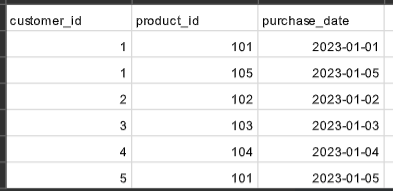

This table consists of customer_id, product_id, and purchase_date. Let's make one of these.

In [16]:
sample.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


First, I grouped the dataset by the user_session. Each session has some number of vies, carts or purchase. We don't need the details of the interactions, just the num of interactions is enough.

* For **page_views**, I took the length of that group as the number of clicks.

* For **session_time**, I substracted the last timestamp with the earliest, then convert the session time with seconds format.

In [46]:
from tqdm import tqdm

In [47]:
cust_interaction = []

for i, group in tqdm(sample.copy().groupby('user_session')):
    min_event_time = group['event_time'].min()
    max_event_time = group['event_time'].max()

    session_time = (max_event_time - min_event_time).total_seconds()
    user_id = group.user_id.iloc[0]
    page_views = len(group)
    session_id = i
    
    cust_interaction.append([user_id, page_views, session_time, session_id])
    # break

100%|██████████████████████████████████████████████████████████████████████████| 87229/87229 [00:38<00:00, 2271.85it/s]


In [48]:
customer_interactions = pd.DataFrame(cust_interaction, columns=['user_id', 'page_views', 'session_time', 'session_id'])
customer_interactions

,user_id,page_views,session_time,session_id
0,550849468,1,0.0,00007ac8-ac2d-4082-97c0-0045424f995c
1,541016295,1,0.0,00033deb-699a-481d-bcee-20bd0f920860
2,512579714,2,64.0,00034c85-6239-43e1-8fb4-0f443b5be51f
3,514366393,4,89.0,00050b08-9e1e-ea34-051a-72246e535d13
4,555470977,2,6.0,00056e5c-f5b0-464b-84d0-d5d02197c4da
...,...,...,...,...
87224,538385152,1,0.0,fffcd4bc-7b65-4274-883e-9b9a2c79864e
87225,513165981,1,0.0,fffd9453-b98c-4e05-b2a2-c7fa2751a66a
87226,512982396,1,0.0,fffdbaff-dcc2-400a-a8df-c1e57661275d
87227,554232877,8,581.0,fffde9f1-e96d-4af6-bc2e-5dfd9692c70d


Lastly, I saved it.

In [49]:
customer_interactions.to_csv('customer_interactions.csv', index=False)

# Product Details

Example:

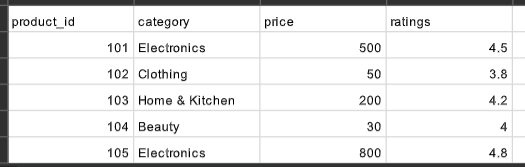

This table consists of product_id, category, price and ratings. But, I will come up with something as replacement for ratings.

First, there are a lot of interactions which consist of the same products. Let's drop them all.

In [50]:
product_details = sample.copy()[['product_id', 'category_id', 'price']].drop_duplicates()
product_details

,product_id,category_id,price
0,44600062,2103807459595387724,35.79
1,3900821,2053013552326770905,33.20
2,17200506,2053013559792632471,543.10
3,1307067,2053013558920217191,251.74
4,1004237,2053013555631882655,1081.98
...,...,...,...
42444299,1004655,2053013555631882655,745.89
42444473,1005161,2053013555631882655,211.92
42444931,1005116,2053013555631882655,1013.86
42447760,57100073,2152289023127715889,33.98


But I have a feeling there will still be some number of duplicates of the same products. Let's check if a product could have different prices. I mean, it's natural to have changing prices on ecommerce.

In [51]:
# To check if a product could change in price

for i, group in sample[['product_id', 'category_id', 'price']].groupby(['product_id', 'category_id']):
    if len(group.price.unique()) > 1:
        price_diff = group.price.max() - group.price.min()
        print(f'id: {i[0]}, price diff: {price_diff}')

id: 1000978, price diff: 333.49
id: 1001588, price diff: 0.37999999999999545
id: 1002062, price diff: 30.450000000000003
id: 1002098, price diff: 38.379999999999995
id: 1002099, price diff: 44.11999999999995
id: 1002100, price diff: 38.379999999999995
id: 1002101, price diff: 38.60999999999996
id: 1002102, price diff: 44.11999999999995
id: 1002367, price diff: 0.4000000000000057
id: 1002396, price diff: 0.2599999999999909
id: 1002398, price diff: 0.38999999999998636
id: 1002482, price diff: 0.3200000000000074
id: 1002484, price diff: 0.37999999999999545
id: 1002494, price diff: 1.5699999999999932
id: 1002524, price diff: 72.63999999999993
id: 1002525, price diff: 0.5199999999999818
id: 1002527, price diff: 51.48000000000002
id: 1002528, price diff: 110.65999999999997
id: 1002532, price diff: 110.65999999999997
id: 1002535, price diff: 332.05999999999995
id: 1002536, price diff: 15.440000000000055
id: 1002538, price diff: 19.440000000000055
id: 1002540, price diff: 50.95999999999998
id:

I have proven that A LOT of products change their prices. So, I grouped them by the product_id and price, then took the mean avg of their price as final price.

In [52]:
prices = []

for i, group in sample[['product_id', 'category_id', 'price']].groupby(['product_id', 'category_id']):
    product_id = i[0]
    category_id = i[1]
    price = group.price.mean()

    prices.append([product_id, category_id, price])

In [ ]:
product_details = pd.DataFrame(prices, columns=['product_id', 'category_id', 'price'])
product_details

Menyala abangkuhhh 🔥🔥

In [54]:
product_details.to_csv('product_details.csv', index=False)

# Purchase History

Example:

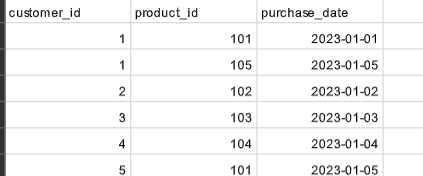

This one constist of customer_id, product_id, purchase_date.

I took the relevant columsn, and rename them accordingly.

In [20]:
# purchase_history = sample.copy()[sample['event_type']=='purchase']
purchase_history = sample.copy()
purchase_history = purchase_history[['user_id', 'product_id','user_session', 'event_time', 'event_type']]
purchase_history = purchase_history.rename(columns={'event_time': 'purchase_date', 'user_session': 'session_id'})
purchase_history

,user_id,product_id,session_id,purchase_date,event_type
0,541312140,44600062,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01 00:00:00+00:00,view
1,554748717,3900821,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 00:00:00+00:00,view
2,519107250,17200506,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01 00:00:01+00:00,view
3,550050854,1307067,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01 00:00:01+00:00,view
4,535871217,1004237,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 00:00:04+00:00,view
...,...,...,...,...,...
42447012,554595637,13400365,b4628ebd-b419-434a-ba25-78edc0728297,2019-10-31 23:45:58+00:00,view
42447281,554595637,13400279,b4628ebd-b419-434a-ba25-78edc0728297,2019-10-31 23:48:07+00:00,view
42447760,515016965,57100073,8ca8247c-9aeb-4b98-9f9a-88fa79ab866d,2019-10-31 23:52:18+00:00,view
42448015,515016965,57100040,8ca8247c-9aeb-4b98-9f9a-88fa79ab866d,2019-10-31 23:54:18+00:00,view


Now, I said that we need something as the target label. So, I decided to use **purchase** value from event_type.

I iterate over the event_type column, and created a new column called `purchased`. It will have the value 1 if it was purchased, and 0 if otherwise (only view or cart).

In [74]:
def get_purchased_value(event_type):
    if event_type == 'purchase':
        return 1
    else:
        return 0

purchase_history['purchased'] = purchase_history['event_type'].apply(get_purchased_value)
purchase_history = purchase_history.drop('event_type', axis=1)
purchase_history

,user_id,product_id,session_id,purchase_date,purchased
0,541312140,44600062,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01 00:00:00+00:00,0
1,554748717,3900821,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 00:00:00+00:00,0
2,519107250,17200506,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01 00:00:01+00:00,0
3,550050854,1307067,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01 00:00:01+00:00,0
4,535871217,1004237,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 00:00:04+00:00,0
...,...,...,...,...,...
42447012,554595637,13400365,b4628ebd-b419-434a-ba25-78edc0728297,2019-10-31 23:45:58+00:00,0
42447281,554595637,13400279,b4628ebd-b419-434a-ba25-78edc0728297,2019-10-31 23:48:07+00:00,0
42447760,515016965,57100073,8ca8247c-9aeb-4b98-9f9a-88fa79ab866d,2019-10-31 23:52:18+00:00,0
42448015,515016965,57100040,8ca8247c-9aeb-4b98-9f9a-88fa79ab866d,2019-10-31 23:54:18+00:00,0


But there is a problem. The same product could be **not purchased** and **purchased** in the same session. How is that possible?

* First, a user would "view" a product. But view will make the product **not purchased**.
* Then, if the user actually purchased it, the product would have **not purchased** and **purchased** value in different row with same session_id.

To solve that, I took only one event_type value for every_session_id. If the user never purchased it, the product will have 0 purchased value. Otherwise it will have 1 purchased value.

In [83]:
purchase = []
for i, group in tqdm(purchase_history.groupby(['product_id', 'session_id'])):
    user_id = group['user_id'].iloc[0]
    product_id = group['product_id'].iloc[0]
    session_id = group['session_id'].iloc[0]
    purchased = group.purchased.max()
    purchase_date = group.purchase_date.max()

    purchase.append([user_id, product_id, session_id, purchase_date, purchased])

In [84]:
purchase_history = pd.DataFrame(purchase, columns=['user_id', 'product_id', 'session_id', 'purchase_date', 'purchased'])
purchase_history

It seems, that we will have imbalanced labels when training the model later.

In [85]:
purchase_history.purchased.value_counts()

purchased
0    269535
1      7226
Name: count, dtype: int64

In [86]:
purchase_history.to_csv('purchase_history.csv', index=False)

# Scribble

In [87]:
print('test')

test


In [88]:
buy_amount = purchase_history.groupby(['product_id', 'session_id']).size()
buy_amount.name = 'buy_amount'
buy_amount = buy_amount.reset_index()
buy_amount

,product_id,session_id,buy_amount
0,1000978,21db6fe3-b667-40cc-acde-63c0861c8bac,1
1,1000978,259156cd-39ce-4b52-be5c-112e82944cd7,1
2,1000978,268cc02f-2c57-493e-8514-ea6ab50e3b1b,1
3,1000978,40fee886-f23b-4025-be2b-286f05fbdc78,1
4,1000978,5331aada-6a85-402a-bfe3-21976b6d1c2a,1
...,...,...,...
276756,60500002,2c48e74e-d100-4fd3-bc03-1f73f56ad592,1
276757,60500002,958883de-b352-4219-81b9-5b819d3d7810,1
276758,60500002,b48fd7f4-2225-4a87-9823-dbf33edcb250,1
276759,60500002,eceb3971-a847-41b0-9600-73a847792af0,1


In [62]:
purchase_history = purchase_history.merge(buy_amount)
purchase_history

,user_id,product_id,session_id,purchase_date,purchased,buy_amount
0,541312140,44600062,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01 00:00:00+00:00,0,2
1,554748717,3900821,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 00:00:00+00:00,0,1
2,519107250,17200506,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01 00:00:01+00:00,0,1
3,550050854,1307067,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01 00:00:01+00:00,0,2
4,535871217,1004237,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 00:00:04+00:00,0,1
...,...,...,...,...,...,...
435932,554595637,13400365,b4628ebd-b419-434a-ba25-78edc0728297,2019-10-31 23:45:58+00:00,0,1
435933,554595637,13400279,b4628ebd-b419-434a-ba25-78edc0728297,2019-10-31 23:48:07+00:00,0,1
435934,515016965,57100073,8ca8247c-9aeb-4b98-9f9a-88fa79ab866d,2019-10-31 23:52:18+00:00,0,1
435935,515016965,57100040,8ca8247c-9aeb-4b98-9f9a-88fa79ab866d,2019-10-31 23:54:18+00:00,0,2


In [63]:
purchase_history.buy_amount.max()

74